In [1]:
import math as ma
import numpy as np
import pylab as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import pandas as pd
from scipy.integrate import odeint

In [2]:
def Rate_generator(IS,M,beta,gamma,mu,N,nnodos,tau):
    nreacciones=3*len(M)+2*nnodos
    Rate=np.zeros((nreacciones))
    #Rates for reactions in nodes
    for i in range(nnodos):
        Rate[2*i] = beta*IS[3*i]*IS[3*i+1]/N # infection
        Rate[2*i+1] = gamma*IS[3*i+1] # recovery
    # Rates for migration
    base=int(2*nnodos)
    for j in range(len(M)):
        Rate[base+3*j]=mu*IS[3*M[j][0]] # migration of susceptibles
        Rate[base+3*j+1]=mu*IS[3*M[j][0]+1] # migration of infectious
        Rate[base+3*j+2]=mu*IS[3*M[j][0]+2] # migration of recovered
    return Rate
# order is [infection_node1,recovery_node1,infection_node2,recovery_node2,...,infection_nodef,recovery_nodef,
# migration1susceptible,migration1infectious,migration1recovered,migration2susceptible,...,migrationMrecovered]

In [4]:
IS = np.array([99,1,1,100,1,1,100,1,1])
M=[[0,1],[1,2],[1,0],[2,1]]
beta=1.0
gamma=0.5
mu=0.1
N=300
nnodos=3
tau=0.1
Rate_generator(IS,M,beta,gamma,mu,N,nnodos,tau)

array([ 0.33      ,  0.5       ,  0.33333333,  0.5       ,  0.33333333,
        0.5       ,  9.9       ,  0.1       ,  0.1       , 10.        ,
        0.1       ,  0.1       , 10.        ,  0.1       ,  0.1       ,
       10.        ,  0.1       ,  0.1       ])

In [11]:
base_vector_infection=np.array([-1,1,0])
nreacciones=3*len(M)+2*nnodos
pop_vector=100*np.ones((nreacciones))

change_vecs=[]
posis_infections=np.arange(0,3*nnodos,3)
posis_infections
for k in range(nnodos):
    change_inf_vector=np.zeros((nreacciones))
    for i in range(nreacciones):
        if i in posis_infections:
            for j in range(3):
                change_inf_vector[i+j]=base_vector_infection[j]
    change_vecs.append(change_inf_vector)


In [2]:
def find(condition):
    res, = np.nonzero(np.ravel(condition))
    return res
def pos_generator(size,node_change,position):
    ch=np.zeros((size))
    

def Change_generator(IS,M,beta,gamma,mu,N,nnodos,tau):
    nreacciones=3*len(M)+2*nnodos
    Change=np.zeros((nreacciones,len(V)))
    
    #Changes for reaction inside nodes
    for i in range(nnodos):
        Change[2*i,:]=
    
def stoc_eqs(INP,beta,gamma,N,nreacciones,tau): 
    V = INP
    Rate=np.zeros((nreacciones))
    Change=np.zeros((nreacciones,len(V)))
    Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0])
    Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1])
    for i in range(nreacciones):
        K_i=np.random.poisson(Rate[i]*tau)
        K_i=min([K_i, V[find(Change[i,:]<0)]])
        V=V+Change[i,:]*K_i
    return V

def Stoch_Iteration(INPUT,beta,gamma,N,nreacciones,T,tau):
    lop=0
    S=[]
    I=[]
    R=[]
    SI=[]
    for lop in T:
        res = stoc_eqs(INPUT,beta,gamma,N,nreacciones,tau)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        if INPUT[1]==0:
            break
        INPUT=res
    return S,I,R
def one_trajectory(S0,I0,R0,beta,gamma,N,nreacciones,Tmax,tau):
    INPUT = np.array((S0,I0,R0))
    T=np.arange(0.0, Tmax, tau)
    [S,I,R]=Stoch_Iteration(INPUT,beta,gamma,N,nreacciones,T,tau)
    return R[-1]

def R_inf_dist(nsims,S0,I0,R0,beta,gamma,popsize,nreacciones,Tmax,tau):
    T=np.arange(0.0, Tmax, tau)
    matrs=[0.0 for i in range(popsize+1)]
    n=[]
    for l in range(nsims):
        Ri=one_trajectory(S0,I0,R0,beta,gamma,popsize,nreacciones,Tmax,tau)
        matrs[int(Ri)]+=1
        n.append(Ri)
        #if l%500==0:
        #    print(l)
    return n

In [3]:
nsims=2000
I0=2
R0=0
N=1000
S0=N-I0
beta=2.0
gamma=1.0
nreacciones=2
Tmax=100
tau=0.05

In [4]:
a=R_inf_dist(nsims,S0,I0,R0,beta,gamma,N,nreacciones,Tmax,tau)

In [5]:
def umbral_AR(umbral,AR):
    ARsn=[n for n in AR if n<umbral]
    return len(ARsn)/len(AR)


In [ ]:

betas=[0.5+0.1*i for i in range(30)]
I0s = [1,2,4]
rets=[]
for i in range(len(betas)):
    aux=R_inf_dist(nsims,S0,I0,R0,betas[i],gamma,N,nreacciones,Tmax,tau)
    aux_u=umbral_AR(0.05*N+I0,aux)
    print(i)
    rets.append(aux_u)

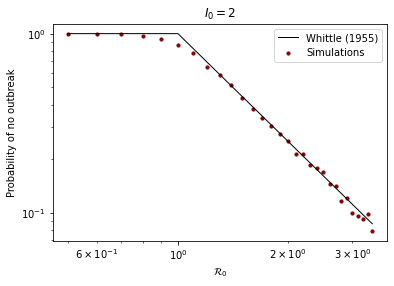

In [8]:
plt.scatter(betas,rets,c="darkred",s=10, label="Simulations")
ret_T=[1 if betas[i]<1 else (1/betas[i])**I0 for i in range(len(betas))]
plt.plot(betas,ret_T,color="black",lw=1,label="Whittle (1955)")
plt.xlabel(r"$\mathcal{R}_0$")
plt.ylabel("Probability of no outbreak")
plt.title("$I_0=2$")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.show()

In [12]:
betas=[0.5+0.1*i for i in range(30)]
I0s = [1,2,4,8]
PNOs=[]
for j in range(len(I0s)):
    ret_s=[]
    print(I0s[j])
    for i in range(len(betas)):
        aux=R_inf_dist(nsims,S0,I0s[j],R0,betas[i],gamma,N,nreacciones,Tmax,tau)
        aux_u=umbral_AR(0.05*N+I0s[j],aux)
        print(i)
        ret_s.append(aux_u)
    PNOs.append(ret_s)


1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


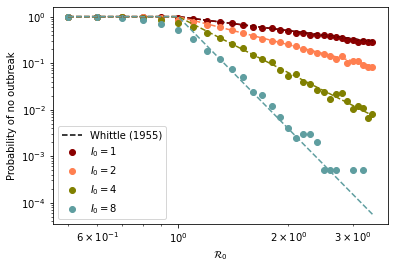

In [36]:
clist=["darkred","coral","olive","cadetblue"]
for i in range(4):
    plt.scatter(betas,PNOs[i],c=clist[i],label="$I_0=$"+str(I0s[i]))
    ret_aux=[1 if betas[k]<1 else (1/betas[k])**I0s[i] for k in range(len(betas))]
    if i==0:
        plt.plot(betas,ret_aux,"--",c="black",label="Whittle (1955)")
    plt.plot(betas,ret_aux,"--",c=clist[i])

plt.xlabel(r"$\mathcal{R}_0$")
plt.ylabel("Probability of no outbreak")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.show()